<a href="https://colab.research.google.com/github/milu234/Project_Perseverance/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Regression**

Simple linear Regression

Multiple Linear Regression

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [144]:
from sklearn.datasets import load_boston

In [145]:
boston_data = load_boston()

In [146]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [147]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


In [148]:
df.shape

(506, 13)

In [149]:
X = df

In [150]:
y = boston_data.target

In [151]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# **Statsmodels**

In [152]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import pandas.util.testing as tm

$y = mX$

$y = mX + c$

In [153]:
X_constant = sm.add_constant(X)

In [154]:
pd.DataFrame(X_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0000,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,1.0000,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,1.0000,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,1.0000,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,1.0000,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0000,0.0626,0.0000,11.9300,0.0000,0.5730,6.5930,69.1000,2.4786,1.0000,273.0000,21.0000,391.9900,9.6700
502,1.0000,0.0453,0.0000,11.9300,0.0000,0.5730,6.1200,76.7000,2.2875,1.0000,273.0000,21.0000,396.9000,9.0800
503,1.0000,0.0608,0.0000,11.9300,0.0000,0.5730,6.9760,91.0000,2.1675,1.0000,273.0000,21.0000,396.9000,5.6400
504,1.0000,0.1096,0.0000,11.9300,0.0000,0.5730,6.7940,89.3000,2.3889,1.0000,273.0000,21.0000,393.4500,6.4800


In [155]:
sm.OLS?

In [156]:
model = sm.OLS(y, X_constant)

In [157]:
lr = model.fit()

In [158]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        04:02:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT' , data = df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        04:02:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Correlation** **Matrix**

In [160]:
form_lr = smf.ols(formula= 'y ~ CRIM + ZN + CHAS + NOX' , data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     53.72
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.14e-37
Time:                        04:02:30   Log-Likelihood:                -1749.9
No. Observations:                 506   AIC:                             3510.
Df Residuals:                     501   BIC:                             3531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8818      2.157     15.245      0.000      28.644      37.119
CRIM          -0.2515      0.044     -5.676      0.000      -0.339      -0.164
ZN             0.0768      0.017      4.462      0.000       0.043       0.111
CHAS           6.9811      1.367      5.109      0.000       4.296       9.666
NOX          -19.4631      3.768     -5.166      0.000     -26.865     -12.061
==============================================================================
Omnibus:                      172.725   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.442
Skew:                           1.680   Prob(JB):                    4.71e-105
Kurtosis:                       6.390   Cond. No.                         327.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Useful diagnostic tool to identify colllinearility between predictors

# **Correlaton Matrix**

In [161]:
pd.options.display.float_format = '{:,.4f}'.format

In [162]:
corr_matrix = df.corr()

In [163]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440


In [164]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6255,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6255,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000


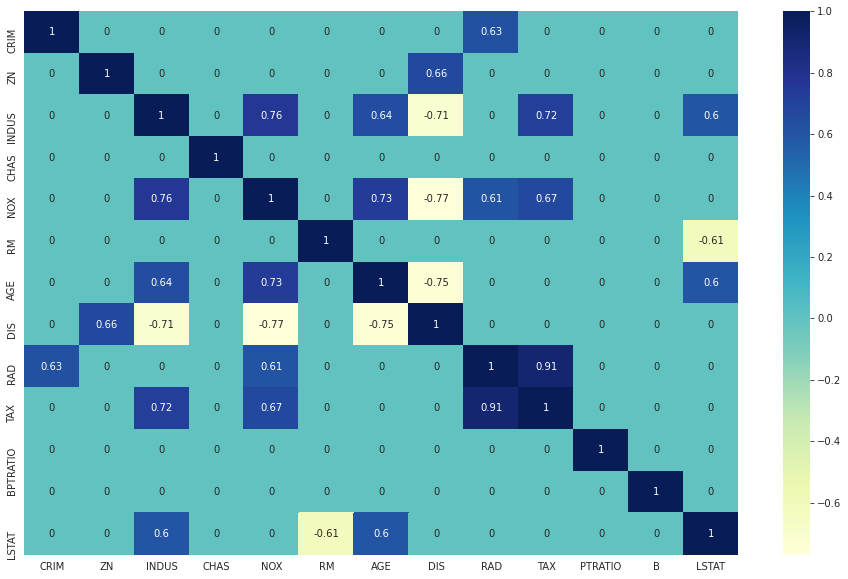

In [165]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot = True, cmap='YlGnBu')
plt.show()

# **Detecting Collinearity with Eigenvectors**

In [166]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [167]:
pd.Series(eigenvalues).sort_values()

8    0.0635
10   0.1693
11   0.1860
12   0.2202
9    0.2769
7    0.3961
6    0.5354
5    0.6574
4    0.8348
3    0.8576
2    1.2426
1    1.4333
0    6.1268
dtype: float64

Note that indexx 8 , eigenvalue of 0.0635, is near to zero or very small compared to others. Small value represents presence of collinearity.

In [168]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.7202
8    0.6335
2    0.2511
1    0.0809
0    0.0460
5    0.0456
4    0.0436
6    0.0386
3    0.0359
12   0.0244
10   0.0234
7    0.0183
11   0.0045
dtype: float64

In [169]:
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


**These are the factors that are causing multicolinearity problem.**

# **Revisiting Feature Importance and Extractions**

Check:
- Direction of the coefficient.
- Impact of the variable factor on the model


In [170]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <a list of 10 Patch objects>)

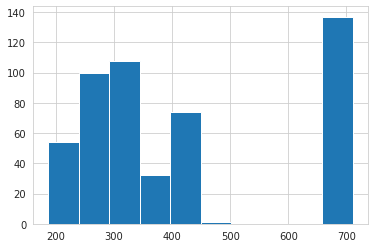

In [171]:
plt.hist((df['TAX']))

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <a list of 10 Patch objects>)

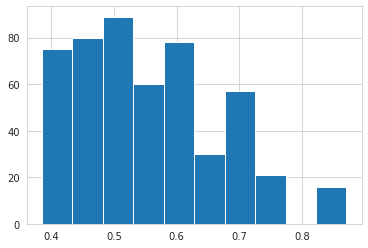

In [172]:
plt.hist(df['NOX'])

# **Standardise Variable to Identify Key Feature(s)**

In order to perform pont 2 properly one needs to standardise the variable 

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
model = LinearRegression()

In [175]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
result  = pd.DataFrame(list(zip(model.coef_, df.columns)) , columns = ['coefficient' , 'name']).set_index('name')

In [177]:
np.abs(result).sort_values(by='coefficient' , ascending = False)

,coefficient
name,
NOX,17.7666
RM,3.8099
CHAS,2.6867
DIS,1.4756
PTRATIO,0.9527
LSTAT,0.5248
RAD,0.3060
CRIM,0.1080
ZN,0.0464


In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
standard_coefficent_linear_reg = make_pipeline(scaler, model)

In [179]:
standard_coefficent_linear_reg.fit(X, y)
result = pd.DataFrame(list(zip(standard_coefficent_linear_reg.steps[1][1].coef_, df.columns)) , columns = ['coefficient' , 'name']).set_index('name')
np.abs(result).sort_values(by = 'coefficient', ascending= False)

,coefficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


# **Use R2 to identify Key Features**

---



---

- Compare R2 of model against R2 model without a featres.
- A Significant change in R2 signify the importance of the feature. 



In [180]:
from sklearn.metrics import r2_score

In [181]:
linear_reg = smf.ols(formula='y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT' , data = df)
benchmak = linear_reg.fit()
result = r2_score(y, benchmak.predict(df))
print(f'The R2 score of the benchmark is {result}')

The R2 score of the benchmark is 0.7406426641094094


without LSTAT

In [182]:
linear_reg = smf.ols(formula='y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B' , data = df)
without_lstat = linear_reg.fit()
result = r2_score(y, without_lstat.predict(df))
print(f'The value of R2 without LSTAT is {result}')

The value of R2 without LSTAT is 0.6842042799773889


without age

In [183]:
linear_reg = smf.ols(formula='y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT' , data = df)
without_age = linear_reg.fit()
result = r2_score(y, without_age.predict(df))
print(f'The value of R2 without AGE is {result}')

The value of R2 without AGE is 0.7406412165505145


# **Regression Summary**

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

**Linear Regression**

In [185]:
from sklearn.linear_model import LinearRegression

The coefficient estimate is [0.47134857]


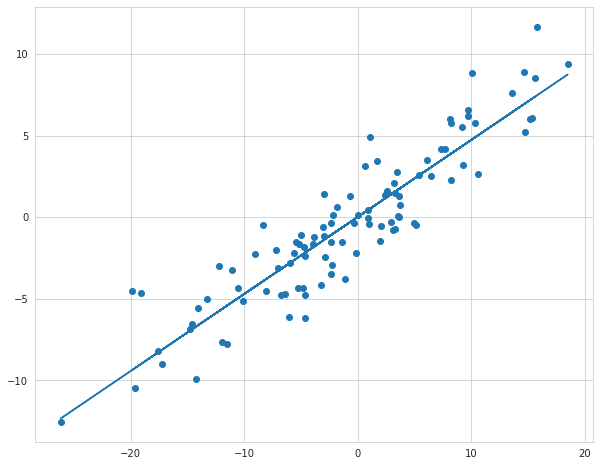

In [186]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

lr = LinearRegression()
lr.fit(rng.reshape(-1,1), y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen)
plt.plot(rng, model_pred)
print(f'The coefficient estimate is {lr.coef_}')

In [187]:
idx = rng.argmax()
y_gen[idx] = 200
idx  = rng.argmin()
y_gen[idx] = -200

The coefficient estmate is [1.50556072]


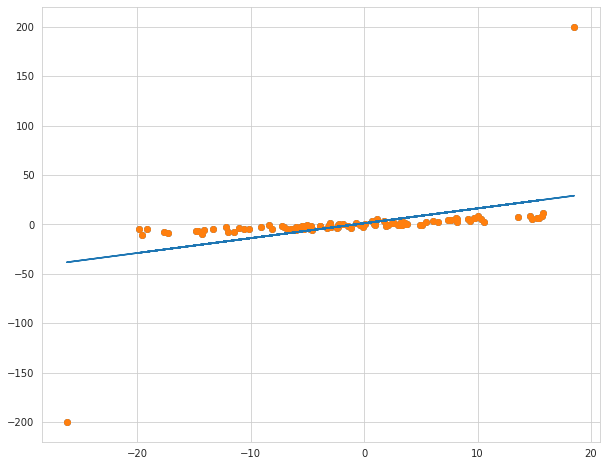

In [188]:
plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen)

o_lr = LinearRegression(normalize=True)
o_lr.fit(rng.reshape(-1, 1), y_gen)
o_model_pred  = o_lr.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen)
plt.plot(rng , o_model_pred)

print(f'The coefficient estmate is {o_lr.coef_}')

**Ridge Regression**

In [189]:
from sklearn.linear_model import Ridge


The Coeffecient estimate for ridge model is [1.00370714]


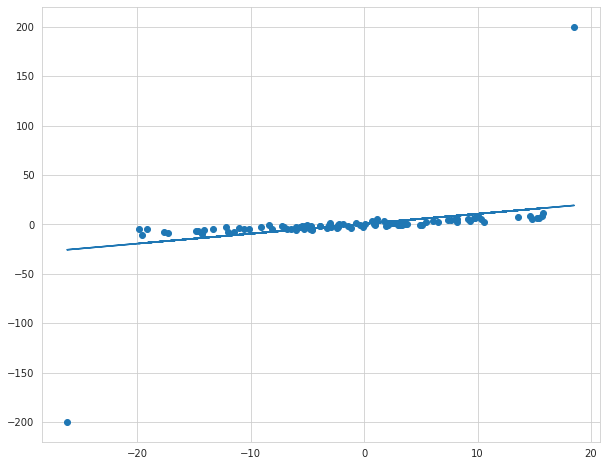

In [190]:
ridge_mod = Ridge(alpha = 0.5, normalize=True)
ridge_mod.fit(rng.reshape(-1,1),y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)
plt.plot(rng, ridge_model_pred)
print(f'The Coeffecient estimate for ridge model is {ridge_mod.coef_}')

**ElasticNet Regression**

In [191]:
from sklearn.linear_model import ElasticNet

The coeffecient estimate of Elastic Net is [0.74724704]


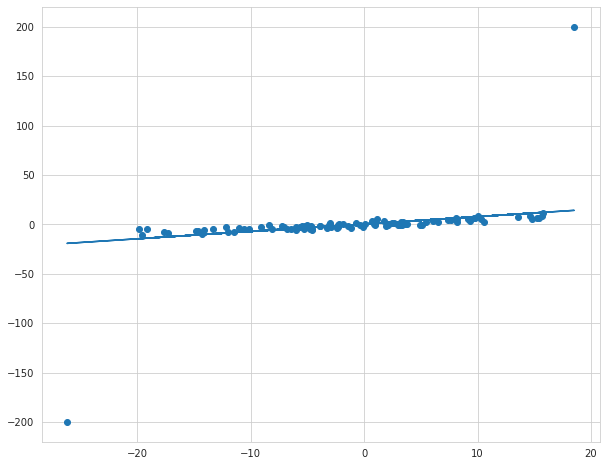

In [192]:
en_mod = ElasticNet(alpha=0.02, normalize=True)
en_mod.fit(rng.reshape(-1,1), y_gen)
en_model_predict = en_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)
plt.plot(rng, en_model_predict)

print(f'The coeffecient estimate of Elastic Net is {en_mod.coef_}')

# **Conclusions**

**When should i use Lasso , Ridge or Elasticnet ?**

- **Ridge** **Regression** can't zero-out coefficients, you either end up including all the coeffeicients or none of them.
- **LASSO** does both parameter shrinkage and variable selection automically.
- if some of your covariates are highly correlated, you want ot look at **Elastic Net** instead of LASSO.


 



# **Polynomial Regression**

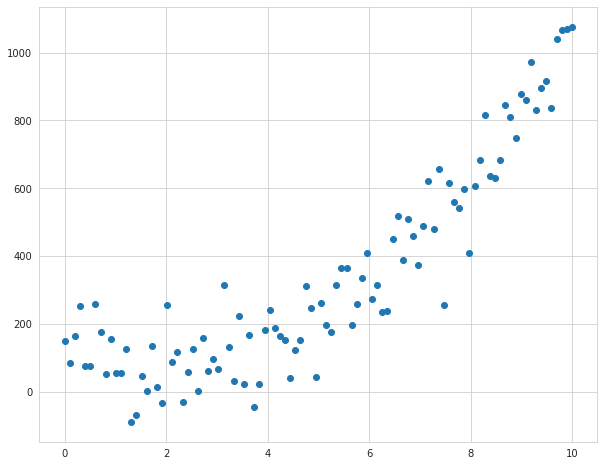

In [193]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + rng + 100

plt.figure(figsize=(10,8))
plt.scatter(X, y)

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Linear Regression


The R2 Score for the polynomial in Linear Regression is 0.7643394574930141


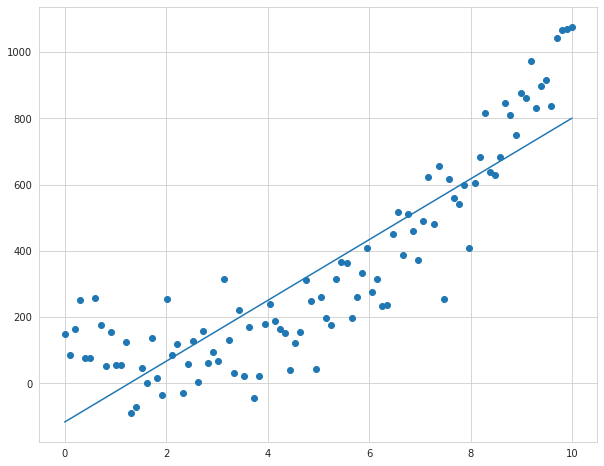

In [195]:
 lr  = LinearRegression()
 lr.fit(X.reshape(-1,1),y)
 model_pred = lr.predict(X.reshape(-1,1))

 plt.figure(figsize=(10,8))
 plt.scatter(X, y)
 plt.plot(X, model_pred)
 print(f'The R2 Score for the polynomial in Linear Regression is {r2_score(y, model_pred)}')

**Polynomial**

In [196]:
from sklearn.preprocessing import PolynomialFeatures

In [197]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

In [198]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

The Polynomial regression score for polynomial equation is 0.9173858308909386


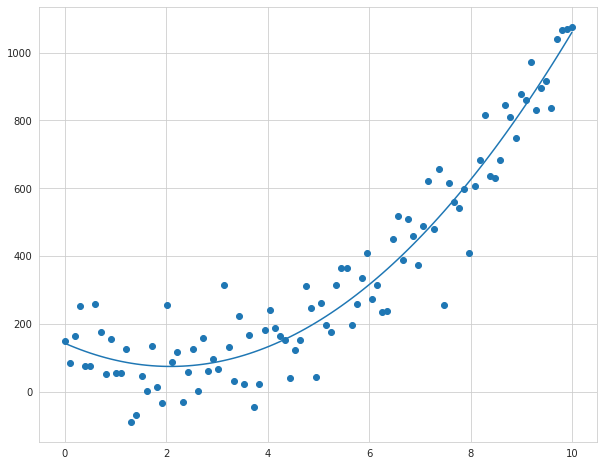

In [199]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X, y_pred)
print(f'The Polynomial regression score for polynomial equation is {r2_score(y,y_pred)}')

# **Nonlinear Relationships**

In [200]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0000,11.9300,0.0000,0.5730,6.5930,69.1000,2.4786,1.0000,273.0000,21.0000,391.9900,9.6700
502,0.0453,0.0000,11.9300,0.0000,0.5730,6.1200,76.7000,2.2875,1.0000,273.0000,21.0000,396.9000,9.0800
503,0.0608,0.0000,11.9300,0.0000,0.5730,6.9760,91.0000,2.1675,1.0000,273.0000,21.0000,396.9000,5.6400
504,0.1096,0.0000,11.9300,0.0000,0.5730,6.7940,89.3000,2.3889,1.0000,273.0000,21.0000,393.4500,6.4800


*Brief Introduction to Decision Tree*

In [201]:
from sklearn.tree import DecisionTreeRegressor

In [202]:
X = df[['LSTAT']].values

In [203]:
tree  = DecisionTreeRegressor(max_depth=2)

In [204]:
y = boston_data.target

In [205]:
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [206]:
sort_idx = X.flatten().argsort()

Text(0, 0.5, 'MEDV')

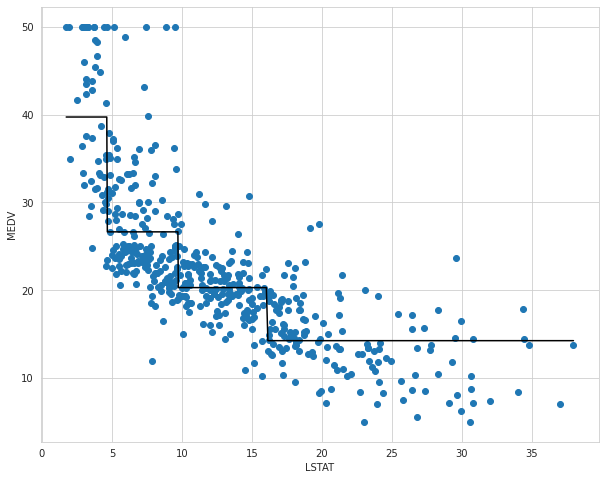

In [207]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color = 'k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# **Brief Introduction to Random Forest**

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [209]:
X = df.values

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3,random_state=42)

In [211]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=1)

In [213]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [214]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [215]:
print(f'MSE TRAIN : {mean_squared_error(y_train,y_train_pred)} || MSE Test : {mean_squared_error(y_test, y_test_pred)} ')

MSE TRAIN : 1.4871444008747448 || MSE Test : 2.989801746666609 


# Brief introduction to AdaBoost

In [216]:
from sklearn.ensemble import AdaBoostRegressor

In [217]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=500,random_state=42)

In [218]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [219]:
y_train_pred = ada.predict(X_train)

In [220]:
y_test_pred = ada.predict(X_test)